In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

In [2]:
backend_inline.set_matplotlib_formats('svg')

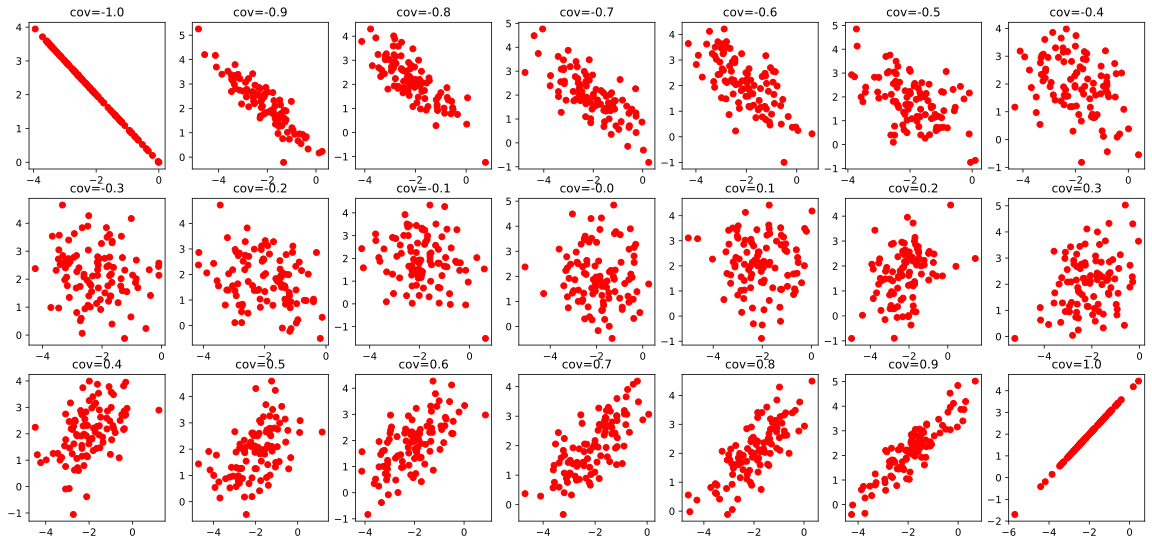

In [6]:
global i
i = 1
#声明并初始化全局变量

def saveData(data):
    np.savetxt('data.csv', data, delimiter=',')
    #存储数据

def readData():
    return np.loadtxt('data.csv', delimiter=',')
    #%读取数据

if __name__ == "__main__":
    f = plt.figure(figsize=(20, 9))

    ax = f.subplots(3, 7)

    n = 0
    for i in np.arange(-1,1.1,0.1):
        (x, y) = divmod(n, 7)
        # print(np.arange(0,0.1,1))
        data = np.random.multivariate_normal(mean=[-2, 2], cov=[[1, i], [i, 1]], size=100)
        ax[int(x),int(y)].scatter(data[:, 0], data[:, 1],  marker='o', c='r')
        ax[int(x), int(y)].set_title('cov={0:.1f}'.format(i))
        n = n + 1
    plt.show()


<center><font size=6> Create By Myself </font></center>

In [7]:
fig = make_subplots(3, 7)

n = 0
for i in np.arange(-1,1.1,0.1):
    (x, y) = n // 7, n % 7
    data = data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, i], [i, 1]], size=100)
    
    fig.add_trace(
        go.Scatter(x=data[:, 0], y=data[:, 1], mode='markers', name=r"$\rho={:.1f}$".format(i)), 
        row=x+1, col=y+1
    )
    n += 1

fig.update_layout(title=r'$corr(X, Y) = \frac{Cov(X, Y)}{\sigma_{X}\sigma_{Y}}$')

<center><font face='楷体', size=5>采用新的满足相关系数的数据的构造</font></center>
<center><font face='楷体', size=4>已知X(i), 求Y(i)</font></center>

$$
X \sim N(\mu_{1}, \sigma_{1}^{2})
$$
$$
Y \sim N(\mu_{2}, \sigma_{1}^{2})
$$
$$
Z \sim N(0, 1)
$$

$$
Y(i) = \mu_{2} + \sigma_{2} \cdot (\rho * A(i) + B * Z(i))
$$

$$
其中 A(i) = \frac{(X(i) - \mu_{1})}{\sigma_{1}} 
$$

$$
B(i) = \sqrt{1 - \rho^{2}}
$$

In [ ]:
X = np.random.normal(loc=0, scale=1, size=100)
Z = np.random.normal(loc=0, scale=1, size=100)

n = 0
for i in np.arange(-1, 1.1, 0.1):
    (x, y) = n // 7, n % 7
    Y = 0 + (i * ((X - 0)/1) + (1 - i ** 2) ** (1 / 2) * Z)
    fig.add_trace(
        go.Scatter(x=X, y=Y, mode='markers', name=r"$\rho={:.1f}$".format(i)), 
        row=x + 1, col=y + 1
    )
    n += 1
fig.update_layout(title=r'$corr(X, Y) = \frac{Cov(X, Y)}{\sigma_{X}\sigma_{Y}}$')